<a href="https://colab.research.google.com/github/dudgus1286/pandas/blob/main/%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%A7%88%EC%9D%B4%EB%8B%9D/02_%ED%98%95%ED%83%9C%EC%86%8C_%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 형태소 분석
> **텍스트를 가장 작은 의미인 형태소로 분해하는 과정**

> 형태소(Morpheme) : 의미를 가진 작은 언어 단위
  - 종류
    - 실질형태소 : 명사, 동사, 형용사, 부사
    - 형식형태소 : 조사, 어미 (ex : ~에, ~는, ~은, ~가, ~다)

> **형태소 분석 과정**
- 분해 : 한국어 문장을 어절(띄어쓰기로 구분된 각각의 단어) 단위로 분해
- 형태소 분석 : 각 어절을 형태소로 세분화(어근, 접미사, 접두사, 조사 등으로 구분)
- 품사 태깅(POS Tagging) : 분리된 형태소에 품사 정보 부여(명사, 동사, 형용사 등으로 구분)

> **형태소 분석의 중요성**
- 정확한 의미 파악(한국어은 하나의 어절이 복잡한 의미를 내포하기 때문)
- 자연어 처리의 기초
- 문맥 이해



## KoNLPy 개요

* KoNLPy (코엔엘파이):
    * [KoNLPy: 파이썬 한국어 NLP — KoNLPy documentation](https://konlpy.org/ko/latest/)
    * [형태소 분석 및 품사 태깅 — KoNLPy 0.4.3 documentation](https://konlpy-ko.readthedocs.io/ko/v0.4.3/morph/)
    * 파이썬 기반의 라이브러리로, 한국어 텍스트의 형태소 분석, 품사 태깅 등을 제공
    * **여러 한국어 형태소 분석 엔진을 통합하여 사용할 수 있으며, 대표적으로 Okt(Open Korean Text), Mecab, Komoran, Hannanum, Kkma 등이 있다.**

    * Okt (Open Korean Text, 이전의 Twitter 형태소 분석기):
        * 속도가 빠르고 사용하기 쉽다
        * 일상적인 언어, 특히 소셜 미디어 텍스트 분석에 적합.
    * Mecab:
        * 은전한닢으로도 불리우며 일본어 형태소 분석기를 기반으로 한국어를 처리하기 위해 수정된 버전.
        * 설치가 까다롭기 때문에 파이썬으로 만들어진 Pecab을 사용하는 것을 추천.
    * Komoran:
        * 정확도가 높으며, 특히 잘못된 맞춤법이나 띄어쓰기가 있는 텍스트에 강점.
    * Hannanum:
        * KAIST에서 개발한 분석기로, 학술적인 목적.
    * Kkma (꼬꼬마):
        * [꼬꼬마 세종 말뭉치 활용 시스템](http://kkma.snu.ac.kr/)
        * 상세한 형태소 분석과 품사 태깅 기능을 제공.

## KoNLPy 외

* Pecab
    * [Pecab: Pure python Korean morpheme analyzer based on Mecab (https://github.com/hyunwoongko/pecab)
* Soynlp(비지도 학습)
    * https://github.com/lovit/soynlp

## KoNLPy 설치

```sh
pip install --upgrade pip
pip install JPype1 (파이썬에서 자바를 사용할 수 있도록 하는 도구)
pip install konlpy --upgrade
```

아래의 조건을 만족해야 설치 됨
```
1) 최신 버전의 JAVA(JDK)를 설치
2) JAVA_HOME 환경변수를 추가
3) path 환경변수에 %JAVA_HOME%\bin; 추가
```

In [1]:
# 구글 코랩에서는 아래의 구문만 실행하면 됨

!pip install konlpy --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 33.7 MB/s eta 0:00:00


In [2]:
import pandas as pd

# 형태소 분석기 로드
from konlpy.tag import Kkma
from konlpy.tag import Okt
from konlpy.tag import Komoran

In [3]:
small_text="버스의 운행시간을 문의합니다. 어?!"
small_text

'버스의 운행시간을 문의합니다. 어?!'

In [4]:
# 꼬꼬마 명사 추출 nouns() 명사 추출
kkma = Kkma()

kkma.nouns(small_text)

['버스', '운행', '운행시간', '시간', '문의']

In [5]:
# morphs() 형태소 추출
kkma.morphs(small_text)

['버스', '의', '운행', '시간', '을', '문의', '하', 'ㅂ니다', '.', '어', '어', '?', '!']

In [6]:
# pos() 품사 태깅
# 형태소 추출 후 태깅하는 방식
kkma.pos(small_text)

[('버스', 'NNG'),
 ('의', 'JKG'),
 ('운행', 'NNG'),
 ('시간', 'NNG'),
 ('을', 'JKO'),
 ('문의', 'NNG'),
 ('하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ('어', 'VV'),
 ('어', 'ECS'),
 ('?', 'SF'),
 ('!', 'SF')]

In [7]:
# 품사 태깅 확인

kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [8]:
for txt, pos in kkma.pos(small_text):
  print(txt, " : ", kkma.tagset[pos])

버스  :  보통명사
의  :  관형격 조사
운행  :  보통명사
시간  :  보통명사
을  :  목적격 조사
문의  :  보통명사
하  :  동사
ㅂ니다  :  평서형 종결 어미
.  :  마침표, 물음표, 느낌표
어  :  동사
어  :  보조적 연결 어미
?  :  마침표, 물음표, 느낌표
!  :  마침표, 물음표, 느낌표


### 어간 추출(語幹 抽出, 영어: stemming)

형태론 및 정보 검색 분야에서 어형이 변형된 단어로부터 접사 등을 제거하고 그 단어의 어간을 분리해 내는 것을 의미한다. 여기서 어간은 반드시 어근과 같아야 할 필요는 없으며, 어근과 차이가 있더라도 관련이 있는 단어들이 일정하게 동일한 어간으로 맵핑되게 하는 것이 어간 추출의 목적이다. 1960년대부터 컴퓨터 과학 분야에서 다양한 어간 추출 관련 알고리즘들이 연구되어 왔다. 많은 웹 검색 엔진들은 동일한 어간을 가진 단어들을 동의어로 취급하는 방식으로 질의어 확장을 하여 검색 결과의 품질을 높인다.

어간 추출 프로그램은 흔히 스테밍 알고리즘(stemming algorithm) 또는 스테머(stemmer)라 불린다.

* [어간 추출 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%96%B4%EA%B0%84_%EC%B6%94%EC%B6%9C)

Okt
- normalize=True

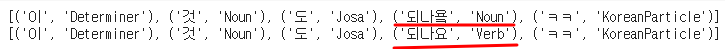

- stem=True
  - '했습니다', '합니다', '한다' 이런 동사들을 원형 하나로 복원해 줌

In [20]:
# 어간 추출 기능을 가지고 있는 Okt 사용
okt = Okt()

print(okt.nouns(small_text))
print(okt.pos(small_text))
print(okt.pos(u'이것도 되나욬ㅋㅋ'))
print(okt.pos(u'이것도 되나욬ㅋㅋ', norm=True))
print(okt.pos(u'이것도 되나욬ㅋㅋ', norm=True, stem=True))

['버스', '운행', '시간', '문의']
[('버스', 'Noun'), ('의', 'Josa'), ('운행', 'Noun'), ('시간', 'Noun'), ('을', 'Josa'), ('문의', 'Noun'), ('합니다', 'Verb'), ('.', 'Punctuation'), ('어', 'Eomi'), ('?!', 'Punctuation')]
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나욬', 'Noun'), ('ㅋㅋ', 'KoreanParticle')]
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나요', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되다', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]


In [14]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [15]:
print(okt.pos(small_text, stem=True))

[('버스', 'Noun'), ('의', 'Josa'), ('운행', 'Noun'), ('시간', 'Noun'), ('을', 'Josa'), ('문의', 'Noun'), ('하다', 'Verb'), ('.', 'Punctuation'), ('어', 'Eomi'), ('?!', 'Punctuation')]


In [18]:
print(okt.pos('버스의 운행시간을 문의합니다. 어?! ㅎㅎ ㅋㅋ ㅇㅇ ^^', stem=True))
print(okt.pos('버스의 운행시간을 문의합니다. 어?! ㅎㅎ ㅋㅋ ㅇㅇ ^^', stem=True, norm=True))

[('버스', 'Noun'), ('의', 'Josa'), ('운행', 'Noun'), ('시간', 'Noun'), ('을', 'Josa'), ('문의', 'Noun'), ('하다', 'Verb'), ('.', 'Punctuation'), ('어', 'Eomi'), ('?!', 'Punctuation'), ('ㅎㅎ', 'KoreanParticle'), ('ㅋㅋ', 'KoreanParticle'), ('ㅇㅇ', 'KoreanParticle'), ('^^', 'Punctuation')]
[('버스', 'Noun'), ('의', 'Josa'), ('운행', 'Noun'), ('시간', 'Noun'), ('을', 'Josa'), ('문의', 'Noun'), ('하다', 'Verb'), ('.', 'Punctuation'), ('어', 'Eomi'), ('?!', 'Punctuation'), ('ㅎㅎ', 'KoreanParticle'), ('ㅋㅋ', 'KoreanParticle'), ('ㅇㅇ', 'KoreanParticle'), ('^^', 'Punctuation')]


### 조사, 어미, 구둣점 제거

In [19]:
for txt, pos in okt.pos(small_text, stem=True):
  if pos not in ['Josa', 'Eomi', 'Punctuation']:
    print(txt, " : ", pos)

버스  :  Noun
운행  :  Noun
시간  :  Noun
문의  :  Noun
하다  :  Verb


In [22]:
clean_text = []
for txt, pos in okt.pos(small_text, stem=True):
  if pos not in ['Josa', 'Eomi', 'Punctuation']:
    clean_text.append(txt)

print(clean_text)

['버스', '운행', '시간', '문의', '하다']


- 위 내용을 함수로 작성하기

In [23]:
def okt_clean(text):
  clean_text = []

  for txt, pos in okt.pos(text, stem=True):
    if pos not in ['Josa', 'Eomi', 'Punctuation']:
      clean_text.append(txt)

  return " ".join(clean_text)

In [24]:
okt_clean(small_text)

'버스 운행 시간 문의 하다'

### KLUE 기사 형태소 분석 적용하기

In [26]:
url = "https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json"

df = pd.read_json(url)
df.head(3)

,guid,title,predefined_news_category,label,annotations,url,date
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,IT과학,생활문화,"{'annotators': ['08', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36
1,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25
2,ynat-v1_train_00002,내년부터 국가RD 평가 때 논문건수는 반영 않는다,IT과학,사회,"{'annotators': ['14', '13', '10'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.03.15. 오후 12:00


In [27]:
df.shape

(45678, 7)

In [30]:
from tqdm import tqdm
tqdm.pandas()

title = df['title'].head(10000)

# okt 형태소 분석기 적용
title_clean = title.progress_map(okt_clean)

100%|██████████| 10000/10000 [00:29<00:00, 340.09it/s]


In [31]:
# 형태소 분석기 적용 전

title

0            유튜브 내달 2일까지 크리에이터 지원 공간 운영
1               어버이날 맑다가 흐려져…남부지방 옅은 황사
2           내년부터 국가RD 평가 때 논문건수는 반영 않는다
3       김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4        회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간
                     ...               
9995        게시판 KB손보 소규모 공연장 안전시설 설치 지원
9996                      신간 소피아 로렌의 시간
9997     창비 세월호 책 다시 봄이 올 거예요 전자책 무료 배포
9998              탬파베이 최지만 시즌 1호 솔로포 폭발
9999         NHN엔터 3분기 영업이익 23억원…흑자전환종합
Name: title, Length: 10000, dtype: object

In [32]:
# 형태소 분석기 적용 후

title_clean

0                 유튜브 내달 2일 까지 크리에이터 지원 공간 운영
1                    어버이날 맑다 흐려지다 남부 지방 옅다 황사
2                   내년 국가 RD 평가 때 논문 건수 반영 않다
3             김명자 신임 과총 회장 원로 젊다 과학자 지혜 모으다 것
4       회색 인간 작가 김 동식 양심 고백 등 새 소설 집 2 권 추다 간
                        ...                  
9995            게시판 KB 손보 소규모 공연장 안전 시설 설치 지원
9996                             신간 소피아 로렌 시간
9997             창비 세월호 책 다시 봄 오다 거 전자책 무료 배포
9998                    탬파베이 최 시즌 1 호 솔로 포 폭발
9999          NHN 엔터 3분 기 영업 이익 23억원 흑자 전환 종합
Name: title, Length: 10000, dtype: object

In [33]:
komoran = Komoran()

In [34]:
komoran.nouns(small_text)

['버스', '운행', '시간', '문의']

In [35]:
komoran.pos(small_text)

[('버스', 'NNG'),
 ('의', 'JKG'),
 ('운행', 'NNG'),
 ('시간', 'NNG'),
 ('을', 'JKO'),
 ('문의', 'NNG'),
 ('하', 'XSV'),
 ('ㅂ니다', 'EF'),
 ('.', 'SF'),
 ('어', 'IC'),
 ('?', 'SF'),
 ('!', 'SF')]

In [36]:
komoran.morphs(small_text)

['버스', '의', '운행', '시간', '을', '문의', '하', 'ㅂ니다', '.', '어', '?', '!']